In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 1.  Section

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Loading the training dataset of house price.
df = pd.read_csv('train.csv')

In [4]:
# Loading the testing dataset of house price.
df_testing = pd.read_csv('test.csv')

In [5]:
df.shape

(1460, 81)

In [ ]:
df_testing.head()

In [99]:
df_testing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Open the file in read mode
f = open("data_description.txt", "r")

# Read the entire content of the file and print it
print(f.read())

# Close the file after reading
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
df = df_testing.drop(['Id'], axis=1)

# 2. Section

In [9]:
# first lets check for datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [10]:
def separate_columns_by_dtype(df):
    int_columns = df.select_dtypes(include=['int64']).columns.tolist()
    float_columns = df.select_dtypes(include=['float64']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    return int_columns, float_columns, object_columns

In [11]:
int_columns, float_columns, object_columns = separate_columns_by_dtype(df)

In [12]:
def check_null(df, title):
    # Map NULL (NaN) values to 0 and non-null values to 1
    counts = pd.DataFrame({
        'NULL': df.isnull().sum(),      # Count NULLs directly
        'NON-NULL': df.notnull().sum()  # Count NON-NULLs directly
    })

    # Set a color palette
    sns.set_palette(['#ff9999', '#66b3ff'])  # Red for NULL and Blue for NON-NULL
    
    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette())

    # Set plot title and labels
    plt.title(f'Count of NULL and NON-NULL Entries in the Dataset of {title}',)
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10,)

    # Adding counters at the top of each bar
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fontsize=9, color='black')

    # Set plot layout to avoid overlap
    plt.tight_layout()

    # Customize legend
    legend = plt.legend(loc='upper right')
    legend.get_texts()[0].set_text('NULL')
    legend.get_texts()[1].set_text('NON-NULL')

    # Show the plot
    plt.show()


In [13]:
# now lets explore the each features and try to remove null values 

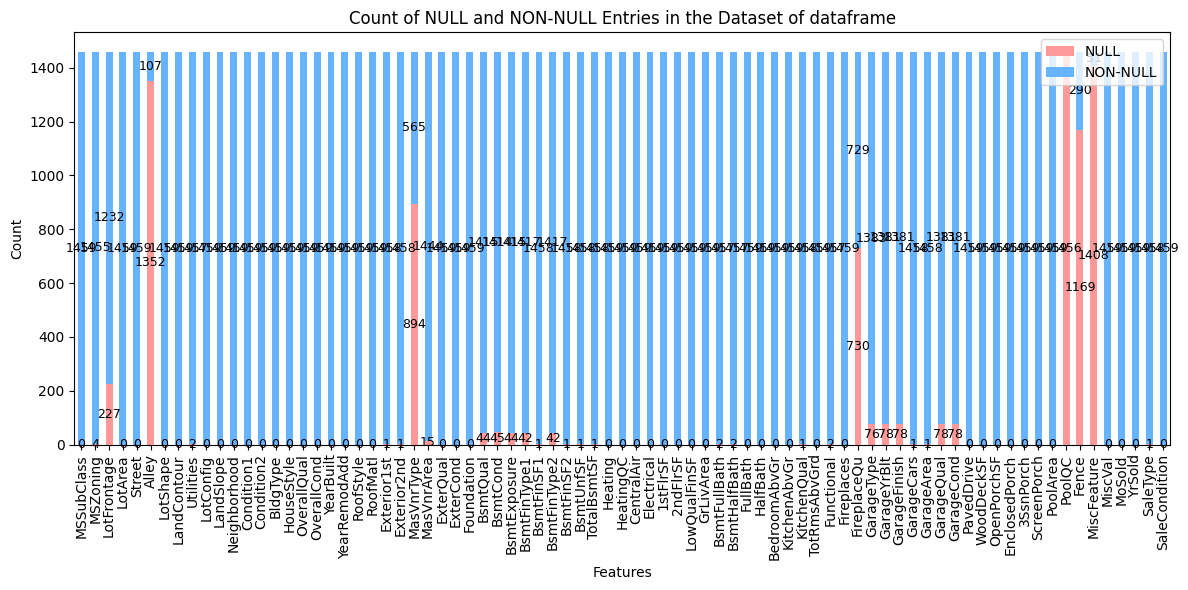

In [14]:
check_null(df, 'dataframe')

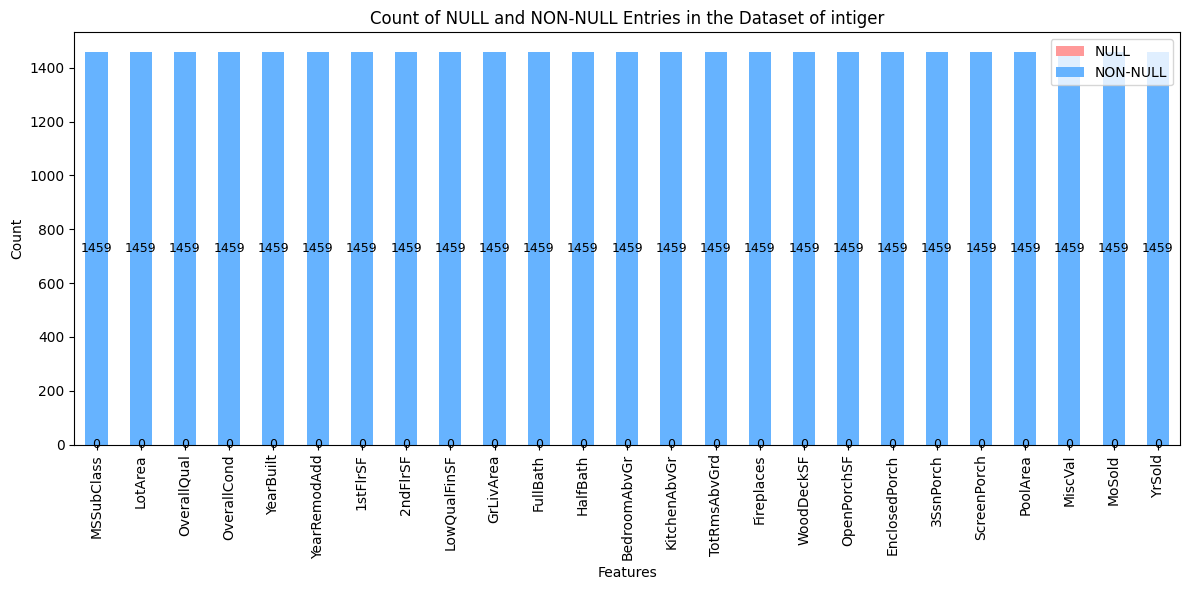

In [15]:
check_null(df[int_columns], 'intiger')

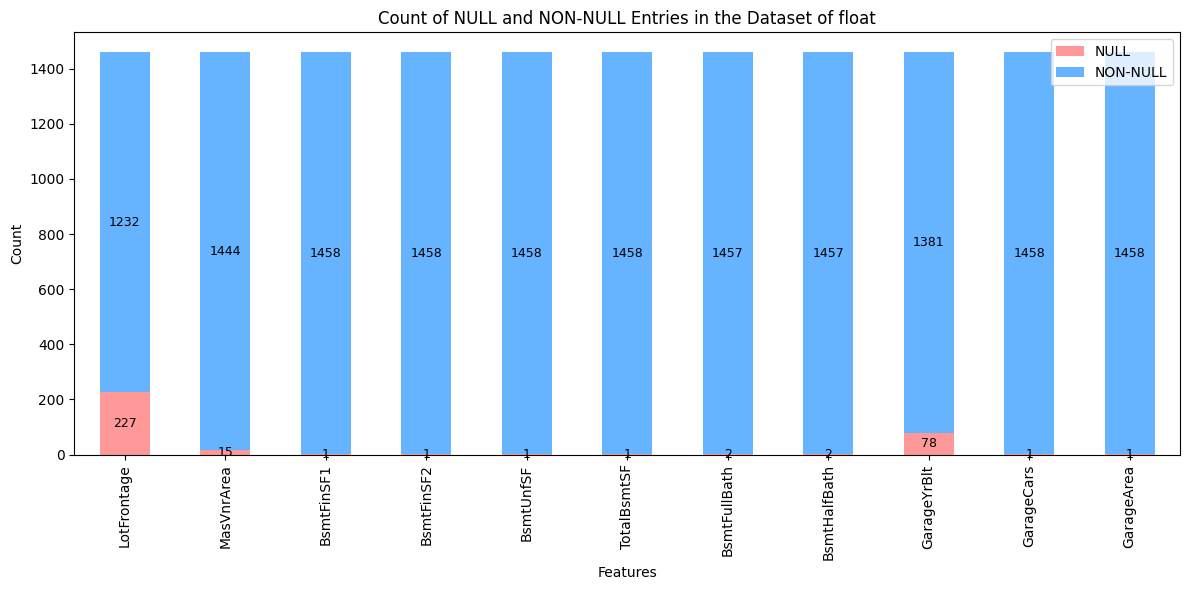

In [16]:
check_null(df[float_columns], 'float')

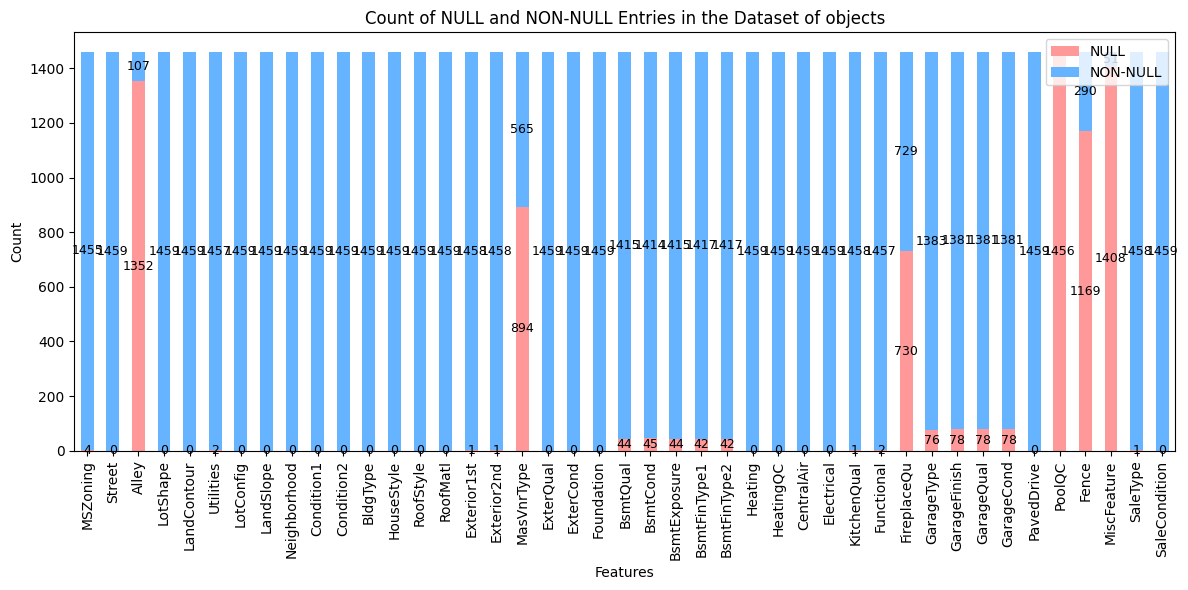

In [17]:
check_null(df[object_columns], 'objects')

In [18]:
### lets remove null and explore the numerical features 


In [19]:
def distribution_plot(df, feature):
    # Set plot style
    # sns.set(style="whitegrid")
    
    # Create the plot
    plt.figure(figsize=(5, 3), dpi=200)
    sns.histplot(df[feature], kde=True, color='teal', edgecolor='black', linewidth=1.5)
    
    # Add titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10,  color='darkblue')
    plt.xlabel(f'Range {feature}', fontsize=10, color='darkgreen')
    plt.ylabel('Frequency', fontsize=10, color='darkgreen')
    
    # Customize grid appearance
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Add a background color
    plt.gca().set_facecolor('whitesmoke')
    
    # Customize axis ticks
    plt.xticks(fontsize=10, color='darkred')
    plt.yticks(fontsize=10, color='darkred')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [20]:
def info(feature):
    print('Descriptive statistics: ',df[feature].describe())
    print('-------------')
    print('Number of null: ',df[feature].isnull().sum())

In [21]:
info('LotFrontage')

Descriptive statistics:  count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64
-------------
Number of null:  227


In [22]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [23]:
info('MasVnrArea')

Descriptive statistics:  count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64
-------------
Number of null:  15


In [24]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [25]:
info('BsmtFinSF1')

Descriptive statistics:  count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64
-------------
Number of null:  1


In [26]:
df[float_columns].columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [27]:
index = np.where(df['BsmtFinSF1'].isnull())[0]


In [28]:
df.iloc[index]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [29]:



sns.countplot


<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)>

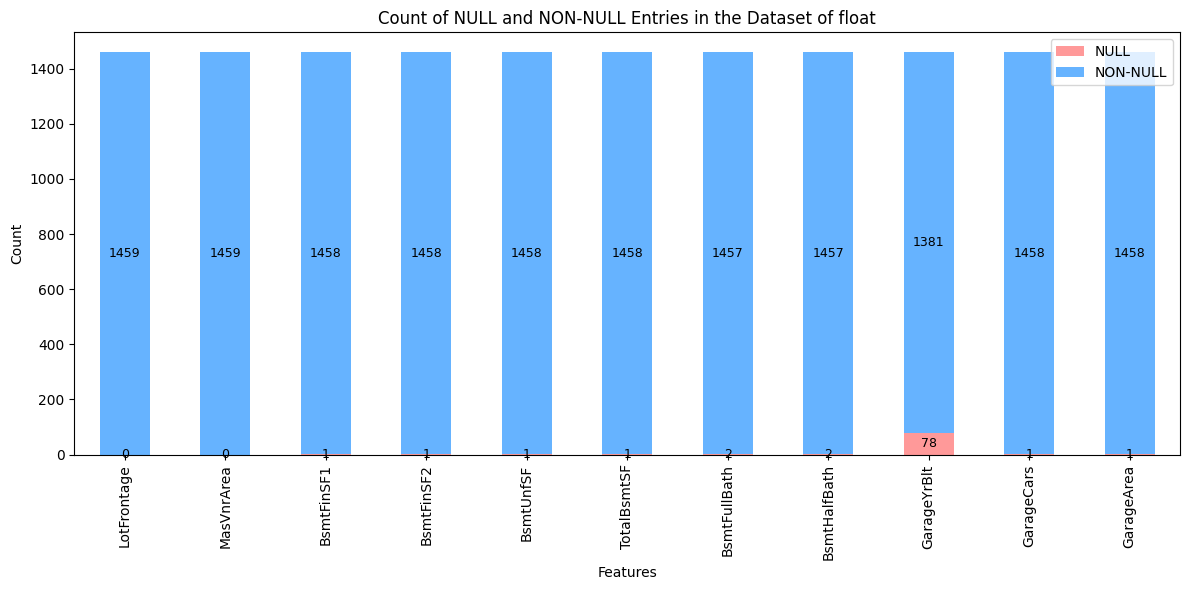

In [30]:
check_null(df[float_columns], 'float')

In [31]:
info('GarageYrBlt')

Descriptive statistics:  count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
-------------
Number of null:  78


In [32]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

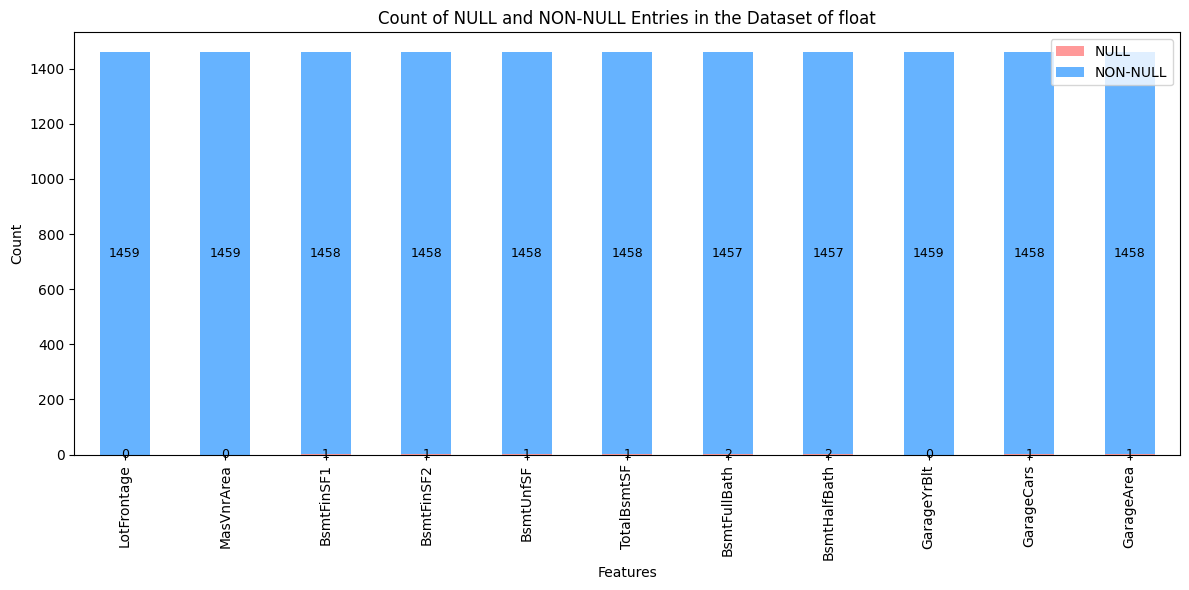

In [33]:
check_null(df[float_columns], 'float')

In [34]:
# LETS EXPLORE AND REMOVE NULL VALUES AND REPLACE WITH APPROPRATE MEANINGS

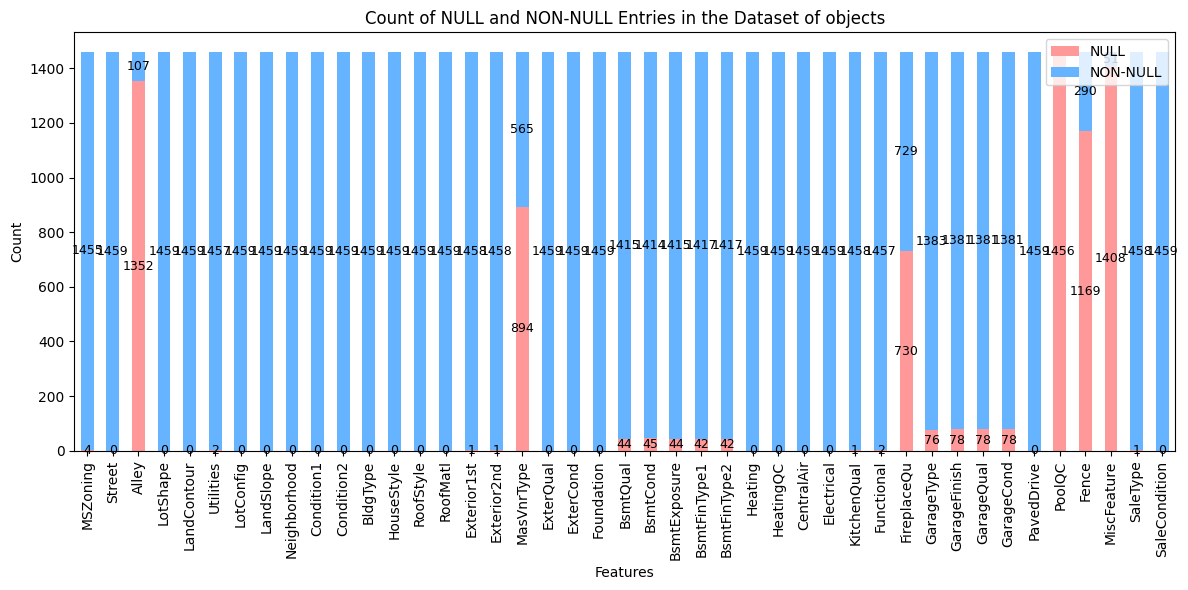

In [35]:
check_null(df[object_columns], 'objects')

In [36]:
df['Alley'].unique()
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access

array([nan, 'Pave', 'Grvl'], dtype=object)

In [37]:
# Define the mapping dictionary
dic = { 'Grvl': 'Gravel', 'Pave': 'Paved' }
df['Alley'] = df['Alley'].fillna('No Alley')

# Replace values based on the dictionary
df['Alley'] = df['Alley'].replace(dic)

df['Alley'].unique()

array(['No Alley', 'Paved', 'Gravel'], dtype=object)

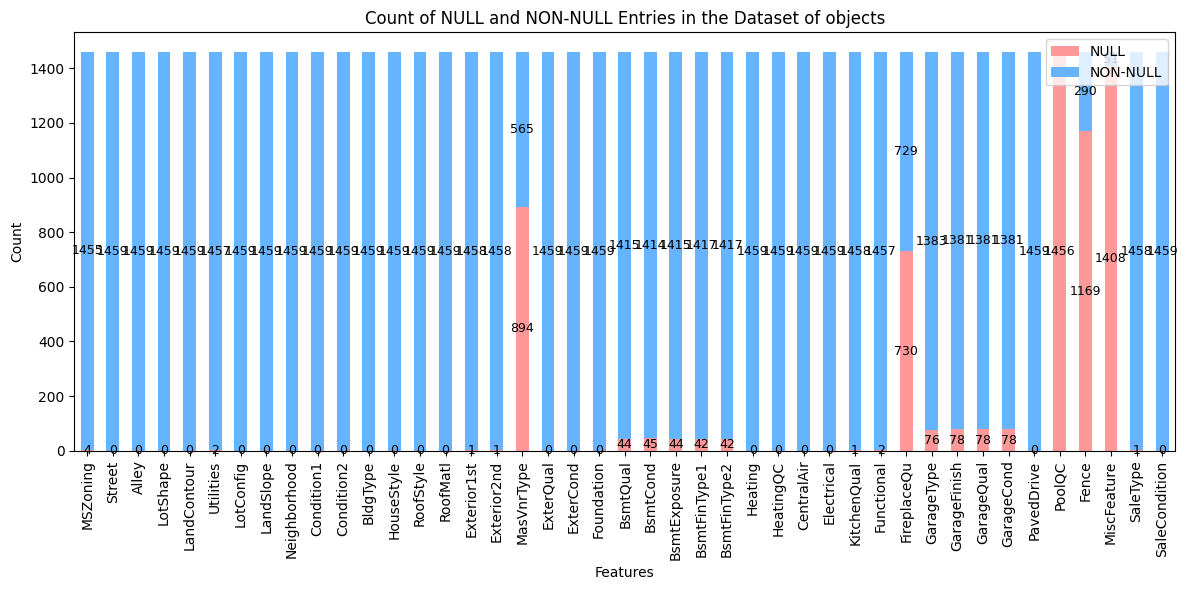

In [38]:
check_null(df[object_columns], 'objects')

In [39]:
df['MasVnrType'].unique()
# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [40]:
# Define the mapping dictionary
dic = { 'BrkCmn': 'Brick Common', 'BrkFace': 'Brick Face', 'CBlock':'Cinder Block' }

df['MasVnrType'] = df['MasVnrType'].fillna('None')
# Replace values based on the dictionary
df['MasVnrType'] = df['MasVnrType'].replace(dic)

df['MasVnrType'].unique()

array(['None', 'Brick Face', 'Stone', 'Brick Common'], dtype=object)

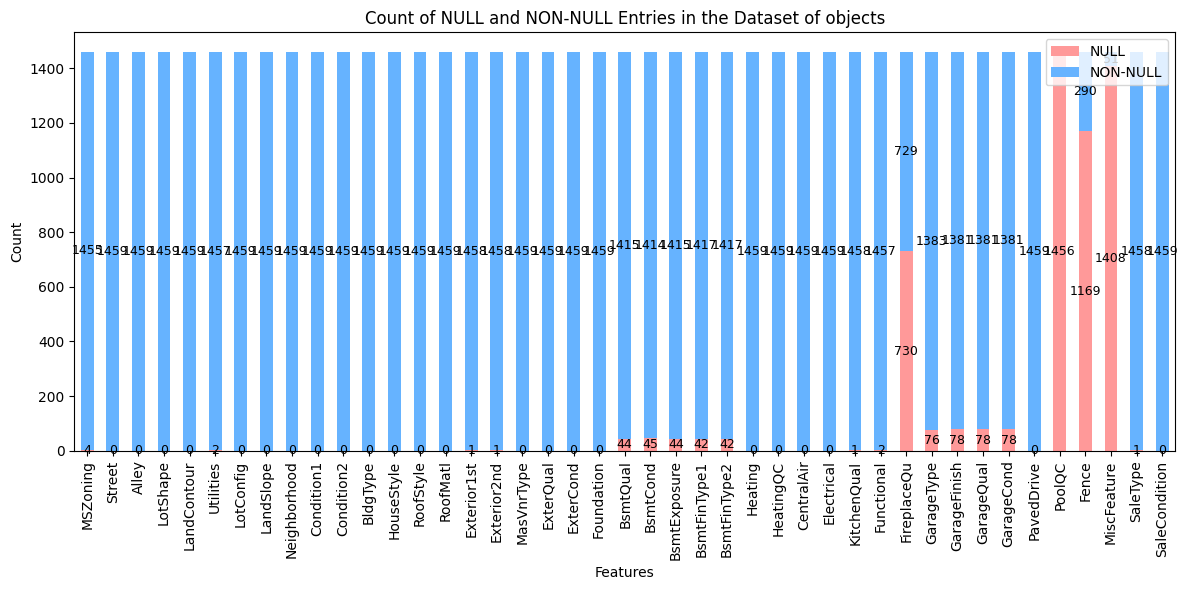

In [41]:
check_null(df[object_columns], 'objects')

In [42]:
df['BsmtQual'].unique()
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [43]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'TA':'Typical', 'Fa':'Fair', 'Po': 'Poor', 'Gd' : 'Good' }
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtQual'] = df['BsmtQual'].replace(dic)

df['BsmtQual'].unique()

array(['Typical', 'Good', 'Excellent', 'Fair', 'No Basement'],
      dtype=object)

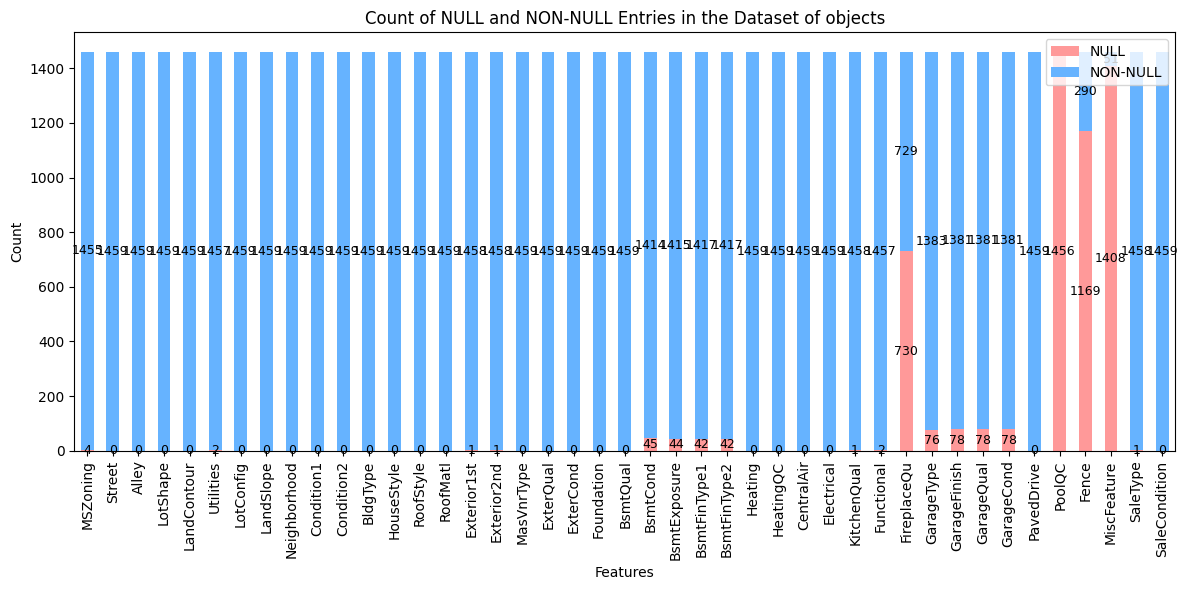

In [44]:
check_null(df[object_columns], 'objects')

In [45]:
df['BsmtCond'].unique()
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement

array(['TA', 'Po', 'Fa', 'Gd', nan], dtype=object)

In [46]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'TA':'Typical', 'Fa':'Fair', 'Po': 'Poor', 'Gd' : 'Good' }
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtCond'] = df['BsmtCond'].replace(dic)

df['BsmtCond'].unique()

array(['Typical', 'Poor', 'Fair', 'Good', 'No Basement'], dtype=object)

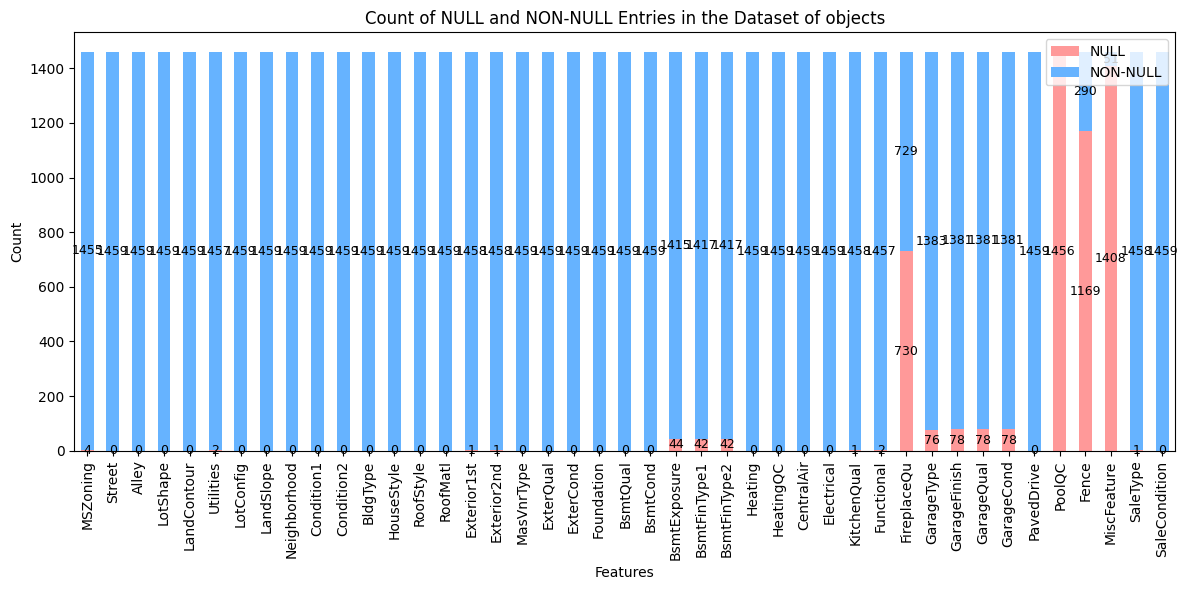

In [47]:
check_null(df[object_columns], 'objects')

In [48]:
df['BsmtExposure'].unique()
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [49]:
# Define the mapping dictionary
dic = { 'Av': 'Average Exposure', 'Mn':'Mimimum Exposure','Gd' : 'Good Exposure', 'No':'No Exposure' }
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Exposure')

# Replace values based on the dictionary
df['BsmtExposure'] = df['BsmtExposure'].replace(dic)

df['BsmtExposure'].unique()

array(['No Exposure', 'Good Exposure', 'Mimimum Exposure',
       'Average Exposure'], dtype=object)

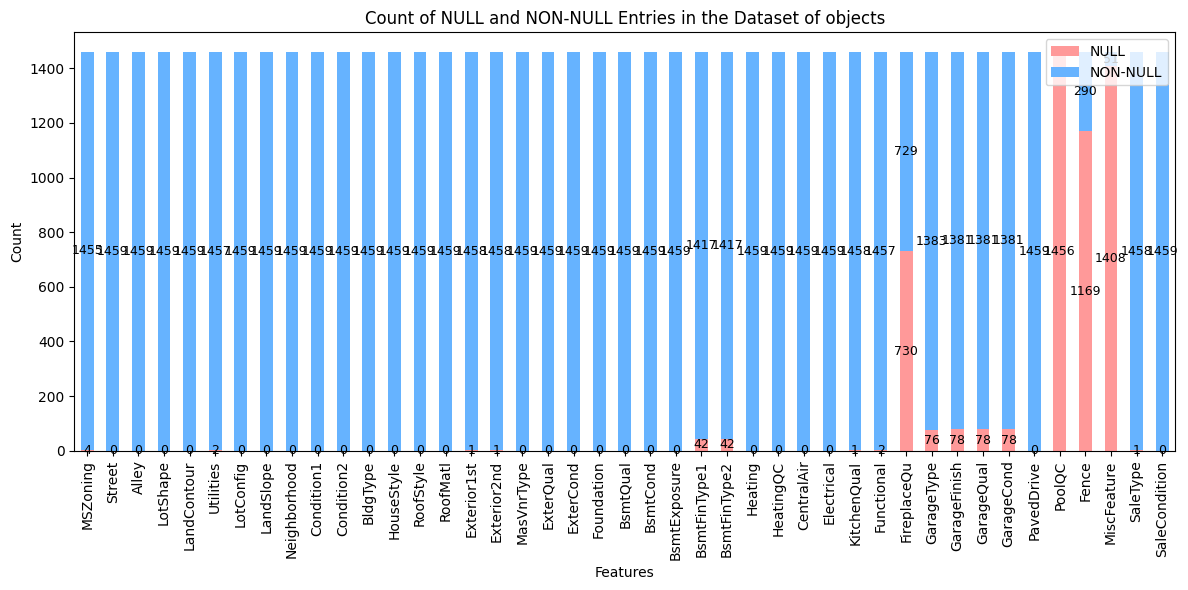

In [50]:
check_null(df[object_columns], 'objects')

In [51]:
df['BsmtFinType1'].unique()
# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ', nan], dtype=object)

In [52]:

# Define the mapping dictionary
dic = { 'GLQ': 'Good Living Quarters', 'ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters',  'Rec':'Average Rec Room',  'LwQ':'Low Quality', 'Unf':'Unfinshed',}
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtFinType1'] = df['BsmtFinType1'].replace(dic)

df['BsmtFinType1'].unique()

array(['Average Rec Room', 'Average Living Quarters',
       'Good Living Quarters', 'Unfinshed',
       'Below Average Living Quarters', 'Low Quality', 'No Basement'],
      dtype=object)

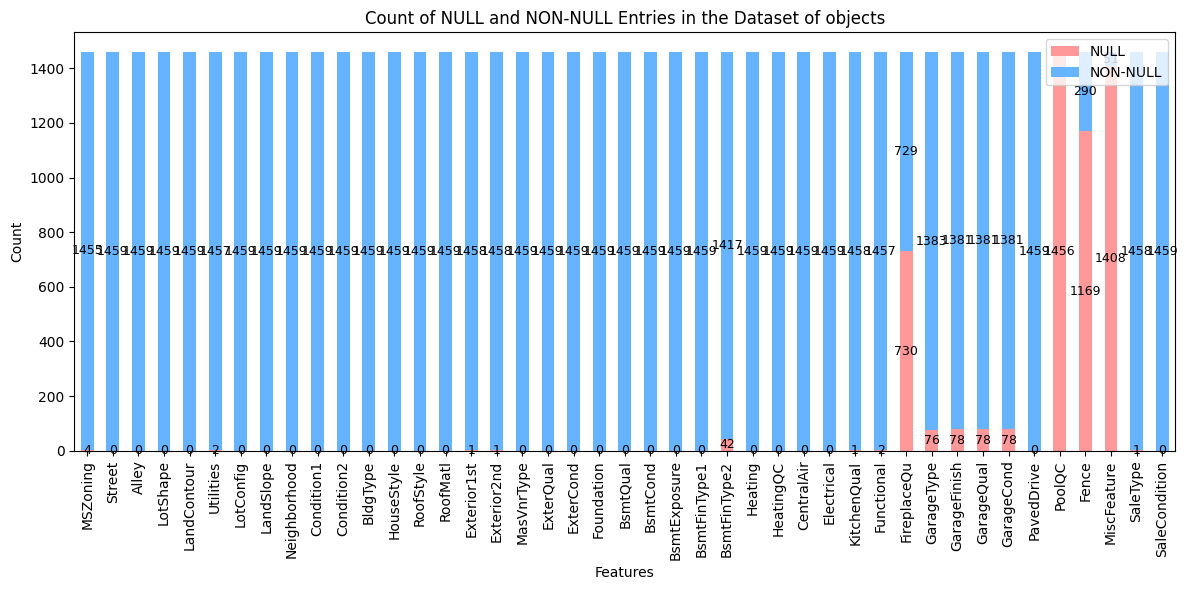

In [53]:
check_null(df[object_columns], 'objects')

In [54]:
df['BsmtFinType2'].unique()
# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['LwQ', 'Unf', 'Rec', 'BLQ', 'GLQ', 'ALQ', nan], dtype=object)

In [55]:
# Define the mapping dictionary
dic = { 'GLQ': 'Good Living Quarters', 'ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters',  'Rec':'Average Rec Room',  'LwQ':'Low Quality', 'Unf':'Unfinshed',}
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtFinType2'] = df['BsmtFinType2'].replace(dic)

df['BsmtFinType2'].unique()

array(['Low Quality', 'Unfinshed', 'Average Rec Room',
       'Below Average Living Quarters', 'Good Living Quarters',
       'Average Living Quarters', 'No Basement'], dtype=object)

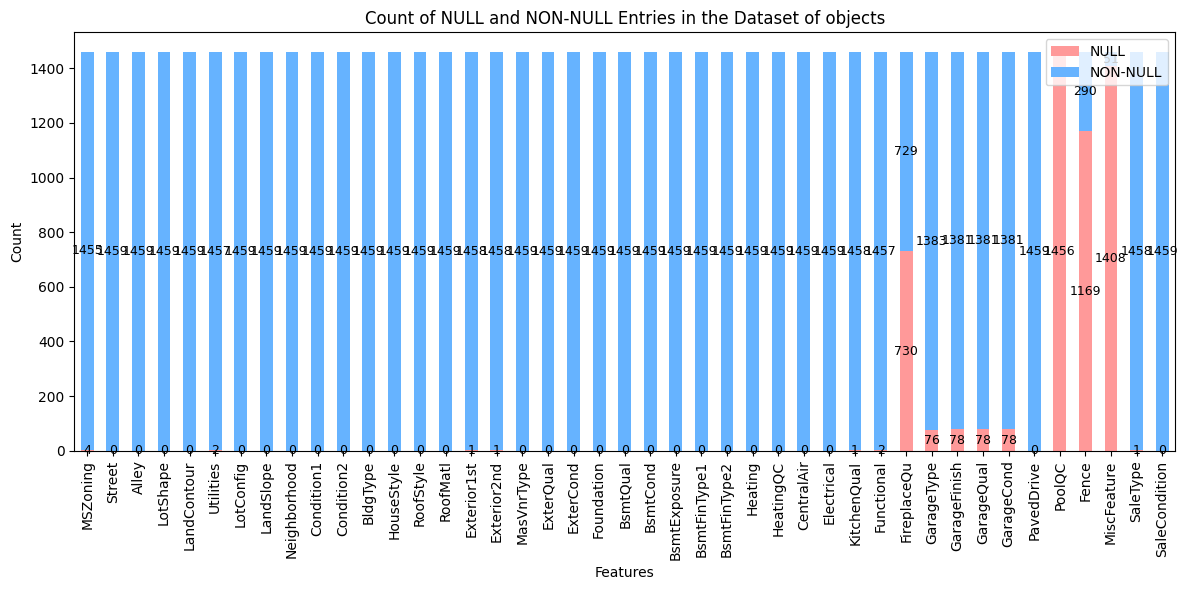

In [56]:
check_null(df[object_columns], 'objects')

In [57]:
df['FireplaceQu'].unique()
# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

array([nan, 'TA', 'Gd', 'Po', 'Fa', 'Ex'], dtype=object)

In [58]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

# Replace values based on the dictionary
df['FireplaceQu'] = df['FireplaceQu'].replace(dic)

df['FireplaceQu'].unique()

array(['No Fireplace', ' Average', 'Good', 'Poor', 'Fair', 'Excellent'],
      dtype=object)

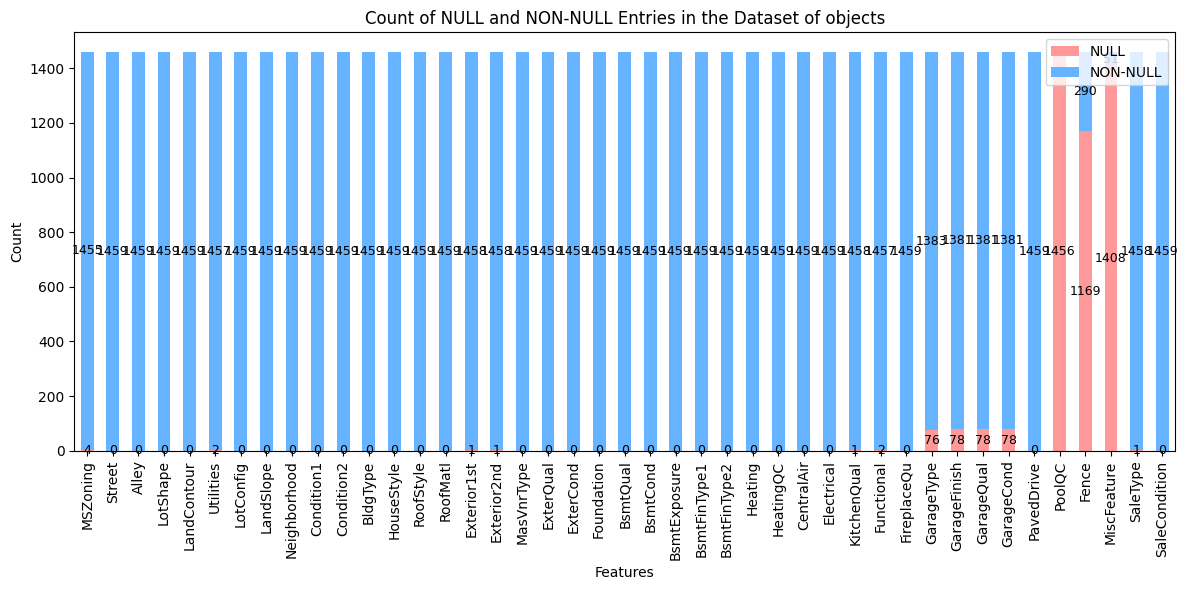

In [59]:
check_null(df[object_columns], 'objects')


In [60]:
df['GarageType'].unique()
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage

array(['Attchd', 'Detchd', 'BuiltIn', nan, 'Basment', '2Types', 'CarPort'],
      dtype=object)

In [61]:
# Define the mapping dictionary
dic = { 'Attchd' :	'Attached to home','Basment': 'Basment Garage', 'BuiltIn':'Built-In',  'CarPort':'Car Port',  'Detchd':'Detached from home'}
df['GarageType'] = df['GarageType'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageType'] = df['GarageType'].replace(dic)

df['GarageType'].unique()

array(['Attached to home', 'Detached from home', 'Built-In', 'No Garage',
       'Basment Garage', '2Types', 'Car Port'], dtype=object)

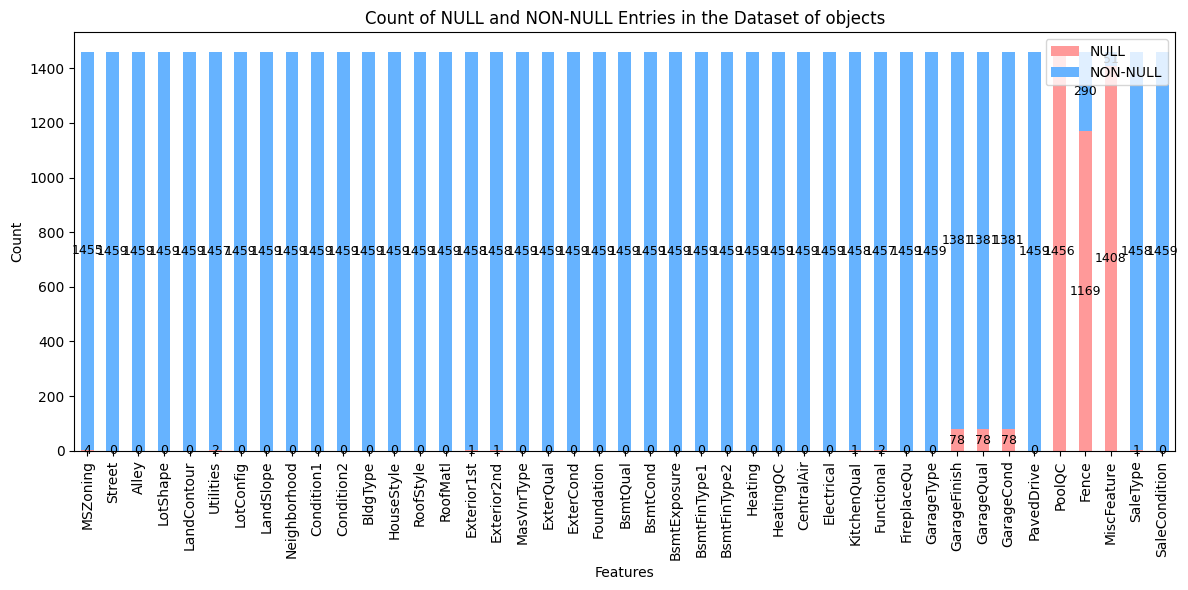

In [62]:
check_null(df[object_columns], 'objects')

In [63]:
df['GarageFinish'].unique()
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [64]:
# Define the mapping dictionary
dic = { 'Fin' :	'Finished','RFn': 'Rough Finished', 'Unf':'Unfinished'}
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageFinish'] = df['GarageFinish'].replace(dic)

df['GarageFinish'].unique()

array(['Unfinished', 'Finished', 'Rough Finished', 'No Garage'],
      dtype=object)

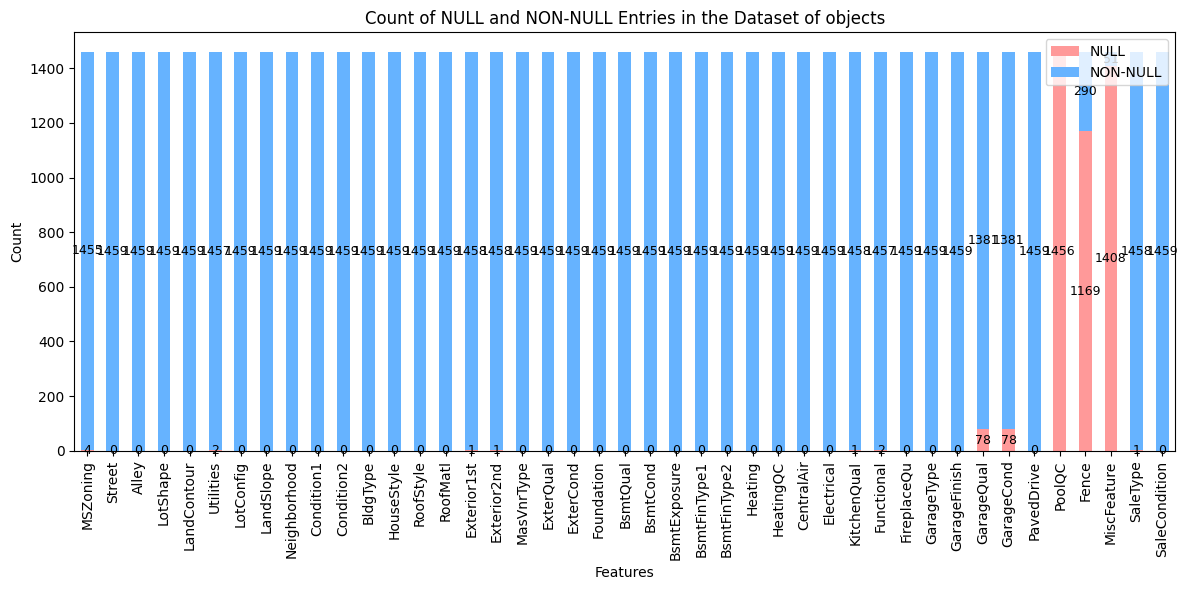

In [65]:
check_null(df[object_columns], 'objects')

In [66]:
df['GarageQual'].unique()
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', nan, 'Fa', 'Gd', 'Po'], dtype=object)

In [67]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['GarageQual'] = df['GarageQual'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageQual'] = df['GarageQual'].replace(dic)

df['GarageQual'].unique()

array([' Average', 'No Garage', 'Fair', 'Good', 'Poor'], dtype=object)

In [68]:
df['GarageCond'].unique()
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', nan, 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [69]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageCond'] = df['GarageCond'].replace(dic)

df['GarageCond'].unique()

array([' Average', 'No Garage', 'Fair', 'Good', 'Poor', 'Excellent'],
      dtype=object)

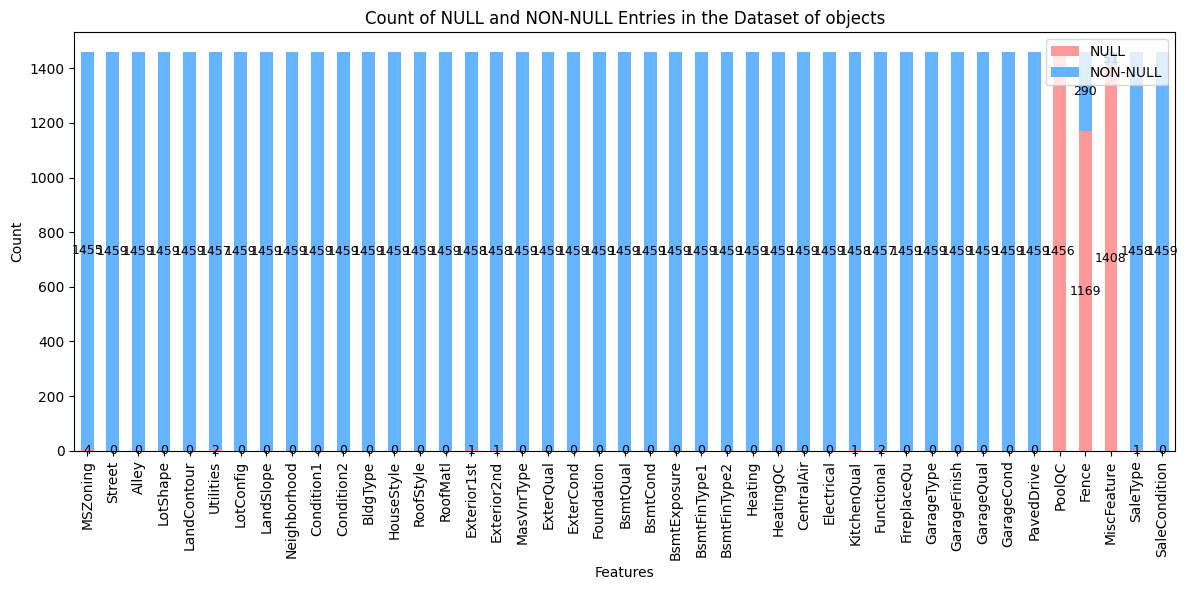

In [70]:
check_null(df[object_columns], 'objects')

In [71]:
df['PoolQC'].unique()
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool

array([nan, 'Ex', 'Gd'], dtype=object)

In [72]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair'}
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

# Replace values based on the dictionary
df['PoolQC'] = df['PoolQC'].replace(dic)

df['PoolQC'].unique()

array(['No Pool', 'Excellent', 'Good'], dtype=object)

In [73]:
df['Fence'].unique()
# Fence: Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

array(['MnPrv', nan, 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [74]:
# Define the mapping dictionary
dic = { 'GdPrv': 'Good Privacy', 'MnPrv':'Minimum Privacy','GdWo':' Good Wood',  'MnWw':'Minimum Wood/Wire'}
df['Fence'] = df['Fence'].fillna('No Fence')

# Replace values based on the dictionary
df['Fence'] = df['Fence'].replace(dic)

df['Fence'].unique()

array(['Minimum Privacy', 'No Fence', 'Good Privacy', ' Good Wood',
       'Minimum Wood/Wire'], dtype=object)

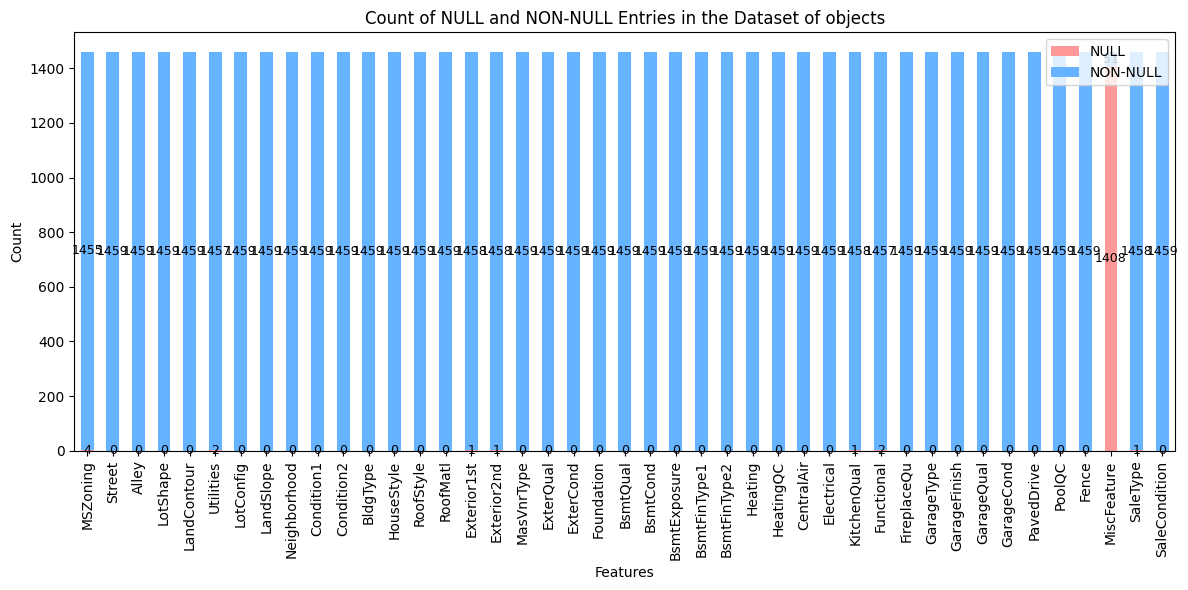

In [75]:
check_null(df[object_columns], 'objects')

In [76]:
df['MiscFeature'].unique()
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None

array([nan, 'Gar2', 'Shed', 'Othr'], dtype=object)

In [77]:
# Define the mapping dictionary
dic = { 'Elev': 'Elevator', 'Gar2':'2nd Garage','Othr':' Other',  'Shed':'Shed', 'TenC':'Tennis Court'}
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Replace values based on the dictionary
df['MiscFeature'] = df['MiscFeature'].replace(dic)

df['MiscFeature'].unique()

array(['None', '2nd Garage', 'Shed', ' Other'], dtype=object)

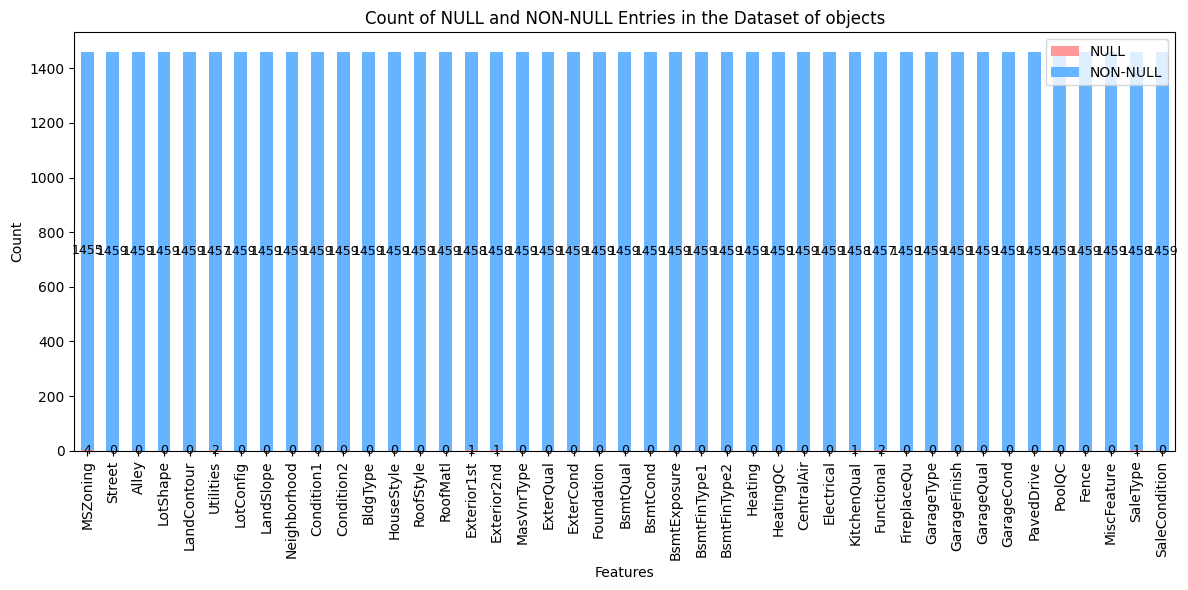

In [78]:
check_null(df[object_columns], 'objects')


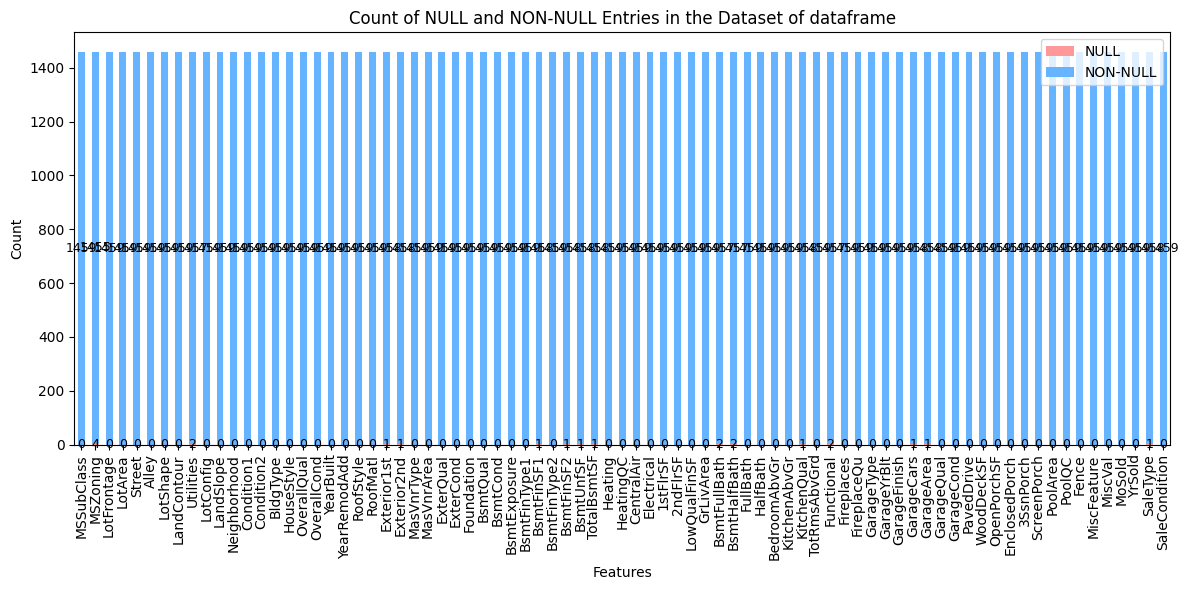

In [79]:
check_null(df, 'dataframe')


In [80]:
df = df.dropna(axis = 0)

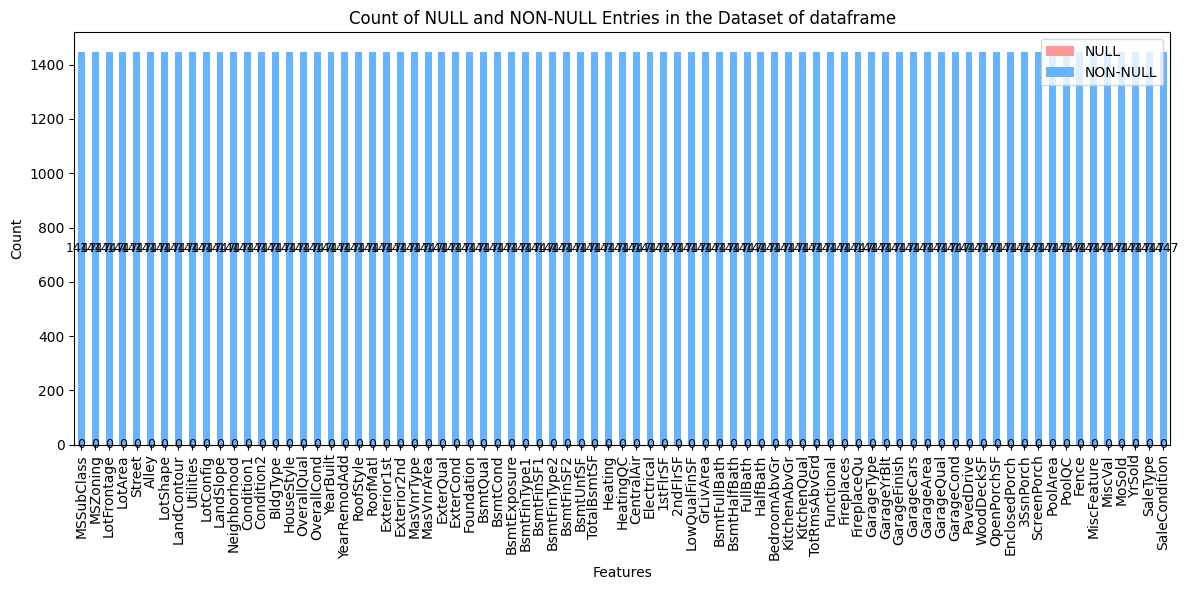

In [81]:
check_null(df, 'dataframe')

In [82]:
df.isnull().sum().sum()

0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1447 non-null   int64  
 1   MSZoning       1447 non-null   object 
 2   LotFrontage    1447 non-null   float64
 3   LotArea        1447 non-null   int64  
 4   Street         1447 non-null   object 
 5   Alley          1447 non-null   object 
 6   LotShape       1447 non-null   object 
 7   LandContour    1447 non-null   object 
 8   Utilities      1447 non-null   object 
 9   LotConfig      1447 non-null   object 
 10  LandSlope      1447 non-null   object 
 11  Neighborhood   1447 non-null   object 
 12  Condition1     1447 non-null   object 
 13  Condition2     1447 non-null   object 
 14  BldgType       1447 non-null   object 
 15  HouseStyle     1447 non-null   object 
 16  OverallQual    1447 non-null   int64  
 17  OverallCond    1447 non-null   int64  
 18  YearBuilt    

In [84]:
df.shape

(1447, 79)

In [85]:
df.dropna().shape

(1447, 79)

In [98]:
df.columns.isin(['SalePrice'])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [87]:
match_result = df_testing.drop(['Id'], axis= 1).columns.isin(df.columns)
np.unique(match_result)

array([ True])

# 3. Section  

In [88]:
# Feature Engineering 

In [89]:
# Categorical data handeling

In [90]:
trn_df = pd.get_dummies(df, drop_first = True)

# 3. section
# Exploratory data analysis

<Axes: >

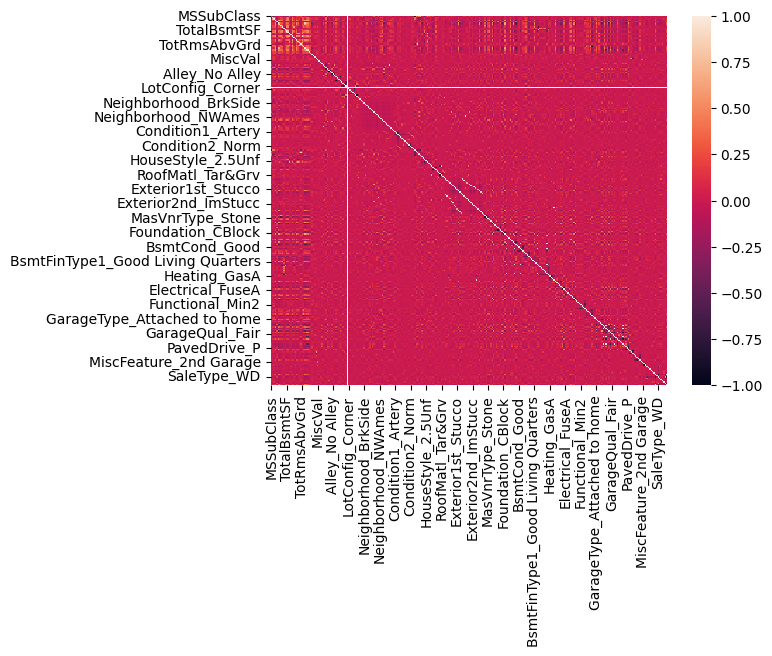

In [91]:
sns.heatmap(trn_df.corr())

In [92]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 1458
Columns: 282 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(246), float64(11), int64(25)
memory usage: 765.9 KB


In [93]:
# train test split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
# Split the DataFrame into features (X) and target (y)
X = trn_df.drop(['SalePrice'], axis=1)  # Drop the target column to create features
y = trn_df['SalePrice']                   # Target variable

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['SalePrice'] not found in axis"

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()


In [ ]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# feature importance with random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feat_labels = trn_df.columns[:-1]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

In [ ]:
plt.bar(range(X_train.shape[1]), importances[indices], align ='center')

In [ ]:
importance_df = pd.DataFrame({
    'Feature': np.array(feat_labels)[indices],
    'Importance': importances[indices]
})

In [ ]:
# top 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# bottom 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.tail(15), palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create and fit the Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   max_features=max_features,
                                   random_state=42)
    
    model.fit(X_train_std, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_std)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and their corresponding MSE
print("Best hyperparameters: ", study.best_params)
print("Best MSE: ", study.best_value)